In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split  # splitting data into training and testing datasets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer  # for scoring
from sklearn.model_selection import GridSearchCV  # for cross validation
from sklearn.metrics import confusion_matrix   # creates confusion matrix
from sklearn.metrics import plot_confusion_matrix  # draws confusion matrix 

## Importing and Formatting the Data

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [3]:
df.drop(columns = ['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], inplace = True)
df

# since these variables contains exit interview information so we will not take these into account

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [4]:
# some other variables contains only single values so it will not be useful in classification

df['Count'].unique()

array([1], dtype=int64)

In [5]:
df['Country'].unique()

array(['United States'], dtype=object)

In [6]:
df['State'].unique()

array(['California'], dtype=object)

In [7]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [8]:
# so we will remove variables with single values
# along with customer id since it is unique for each customer
# along with lat long since we have separate columns (latitude, longitude) for it


df.drop(columns = ['CustomerID', 'Count', 'Country', 'State', 'Lat Long'], inplace = True)
df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [9]:
# although its ok to have whitespaces in city names for xgboost and classification, we cant have any whitespaces if we want to draw a tree

df['City'].replace(' ', '_', regex = True, inplace = True)
df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [10]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [11]:
df.columns = df.columns.str.replace(' ', '_')
df

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


## Identifying and Handling missing Data 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [13]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [15]:
# df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

# raises an error as it contains missing values ie empty string that cannot be converted into int thus first we have to remove those

In [16]:
# xgboost determines default behaviour for missing data
# hence we need to fing the missing values and set it to 0

df.loc[df['Total_Charges'] == ' ']


# these people have tenure month = 0 ie they have just started the service, 
# so we can either remove them or set it to zero as their churn value is also set to 0

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [17]:
len(df.loc[df['Total_Charges'] == ' '])

# missing data is small so we can replace it with 0

11

In [18]:
df.loc[df['Total_Charges'] == ' ', 'Total_Charges'] = 0

In [19]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [20]:
# now we can change the datatype

df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip_Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior_Citizen     7043 non-null   object 
 6   Partner            7043 non-null   object 
 7   Dependents         7043 non-null   object 
 8   Tenure_Months      7043 non-null   int64  
 9   Phone_Service      7043 non-null   object 
 10  Multiple_Lines     7043 non-null   object 
 11  Internet_Service   7043 non-null   object 
 12  Online_Security    7043 non-null   object 
 13  Online_Backup      7043 non-null   object 
 14  Device_Protection  7043 non-null   object 
 15  Tech_Support       7043 non-null   object 
 16  Streaming_TV       7043 

In [22]:
# since we have handled missing data now we can replace rest of the white spaces as well

df.replace(' ', '_', regex = True, inplace = True)
df

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,Yes,Bank_transfer_(automatic),21.15,1419.40,0
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,1990.50,0
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,7362.90,0
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,346.45,0


## Formatting the Data : Split the data into dependent and independent variables

In [23]:
X = df.drop(columns = ['Churn_Value']).copy()

X

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,Yes,Bank_transfer_(automatic),21.15,1419.40
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,No,Yes,Yes,Yes,Yes,One_year,Yes,Mailed_check,84.80,1990.50
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,Yes,No,Yes,Yes,One_year,Yes,Credit_card_(automatic),103.20,7362.90
7041,Angelus_Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,29.60,346.45


In [24]:
Y = df['Churn_Value'].copy()

Y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn_Value, Length: 7043, dtype: int64

## Formatting the Data : One hot encoding

In [25]:
# city - category
    # 1 - los angeles
    # 2 - beverly hills, etc
    
# zip code - category
    # 1 - 90003
    # 2 - 90005, etc

    
# latitude - float
# longitude - float

# gender - category
    # 1 - male
    # 2 - female
    
# senior citizen - category
    # 1 - Yes
    # 2 - No
    
# partner - category
    # 1 - Yes
    # 2 - No
    
# dependents - category
    # 1 - Yes
    # 2 - No
    
# tenure months - float
    
# phone service - category
    # 1 - Yes
    # 2 - No
    
# multiple lines - category
    # 1 - Yes
    # 2 - No
    
# internet service - category
    # 1 - No
    # 2 - DSL
    # 3 - Fiber optic
    
# online security - category
    # 1 - Yes
    # 2 - No
    
# online backup - category
    # 1 - Yes
    # 2 - No
    
# device protection - category
    # 1 - Yes
    # 2 - No
    
# tech support - category
    # 1 - Yes
    # 2 - No
    
# streaming tv - category
    # 1 - Yes
    # 2 - No
    
# streaming movies - category
    # 1 - Yes
    # 2 - No
    
# contract - category
    # 1 - month to month
    # 2 - one year
    # 3 - two year
    
# paperless billing - category
    # 1 - Yes
    # 2 - No
    
# payment method - category
    # 1 - mailed check
    # 2 - electronic check, etc

# monthly charges - float

# total charges - float

In [26]:
X_encoded = pd.get_dummies(X, columns = ['City',
                                         'Gender',
                                         'Senior_Citizen',
                                         'Partner',
                                         'Dependents',
                                         'Phone_Service',
                                         'Multiple_Lines',
                                         'Internet_Service',
                                         'Online_Security',
                                         'Online_Backup',
                                         'Device_Protection',
                                         'Tech_Support',
                                         'Streaming_TV',
                                         'Streaming_Movies',
                                         'Contract',
                                         'Paperless_Billing',
                                         'Payment_Method'])

X_encoded

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,90005,34.059281,-118.307420,2,70.70,151.65,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,90006,34.048013,-118.293953,8,99.65,820.50,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,90010,34.062125,-118.315709,28,104.80,3046.05,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,90015,34.039224,-118.266293,49,103.70,5036.30,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,92285,34.341737,-116.539416,72,21.15,1419.40,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
7039,92301,34.667815,-117.536183,24,84.80,1990.50,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7040,92304,34.559882,-115.637164,72,103.20,7362.90,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
7041,92305,34.167800,-116.864330,11,29.60,346.45,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
Y.unique()

array([1, 0], dtype=int64)

## Building a preliminary XGBoost Model

In [28]:
# total people who left the company / total people in the dataset

sum(Y)/len(Y)


# ie only 27% of people left the company, 
# so we will use stratification to maintain the same percentage of people who left the company in both training and testing data

0.2653698707936959

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42, stratify = Y)

In [30]:
sum(Y_train)/len(Y_train)

0.2654297614539947

In [31]:
sum(Y_test)/len(Y_test)

0.26519023282226006

In [32]:
# ie both train and test data contain same percentage of people who left the company
# now we will build the prliminary model,
# and instead of determining the optimal no of trees by cross validation,
# we will use early stopping to stop building trees whem they no loger improve the situation

In [33]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42)
clf_xgb.fit(X_train,
            Y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, Y_test)])

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64036
[1]	validation_0-aucpr:0.64404
[2]	validation_0-aucpr:0.65124
[3]	validation_0-aucpr:0.65052
[4]	validation_0-aucpr:0.65321
[5]	validation_0-aucpr:0.64854
[6]	validation_0-aucpr:0.65459
[7]	validation_0-aucpr:0.65895
[8]	validation_0-aucpr:0.65746
[9]	validation_0-aucpr:0.65850
[10]	validation_0-aucpr:0.66217
[11]	validation_0-aucpr:0.66527
[12]	validation_0-aucpr:0.66322
[13]	validation_0-aucpr:0.66310
[14]	validation_0-aucpr:0.66000
[15]	validation_0-aucpr:0.66027
[16]	validation_0-aucpr:0.65781
[17]	validation_0-aucpr:0.65593
[18]	validation_0-aucpr:0.65738
[19]	validation_0-aucpr:0.65829
[20]	validation_0-aucpr:0.65683
[21]	validation_0-aucpr:0.65707


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


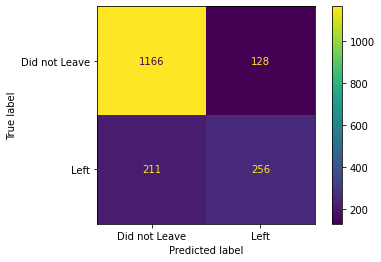

In [34]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      Y_test,
                      values_format = 'd',
                      display_labels = ['Did not Leave', 'Left'])


# out of 1294 that did not leave 1166 (90%) were correctly classified
# out of 467 that left 256 (55%) were correctly classified

In [35]:
# to capture more of people that left, xgboost has a parameter scale_pos_weight that helps with imbalanced data as in this case
# we will try to improve predictions using cross validation to optimize the parameters

## Optimize parameters with Cross Validation and GridSearchCV()

In [36]:
# xgboost has a lot of hyperparameters and parameters that have to be configured manually :
    # max_depth - max depth of the tree
    # learning_rate - the learning rate eta
    # gamma - pruning parameter
    # reg_lambda - regularization parameter lambda


# since we have many parameters, we will use GridsearchCV(),
# we specify a bunch of potential values of parameters and GridSearchCV() tests all possible combination of parameters

In [37]:
# NOTE : When data is imbalanced, XGBoost manual says...
# If you only care about the overall performance metric (AUC) of your prediction:
    # Balance the positive and negative weights viascale_pos_weight
    # Use AUC for evaluation

In [38]:
# ROUND 1

# param_grid = {
#     'max_depth' : [3, 4, 5],
#     'learning_rate' : [0.1, 0.01, 0.05],
#     'gamma' : [0, 0.25, 1.0],
#     'reg_lambda' : [0, 1.0, 10.0],
#     'scale_pos_weight' : [1, 3, 5]
# }

# Output : max_depth : 4, learning_rate : 0.1, gamma : 0.25, reg_lambda : 10, scale_pos_weight : 3
# Because learning_rate and reg_lambda were at the end of their range, we will continue to explore them 


# ROUND 2

# param_grid = {
#     'max_depth' : [4],
#     'learning_rate' : [0.1, 0.5, 1.0],
#     'gamma' : [0.25],
#     'reg_lambda' : [10.0, 20.0, 100.0],
#     'scale_pos_weight' : [3]
# }

# Output : max_depth : 4, learning_rate : 0.1, reg_lambda : 10


# NOTE : to speed up cross validation and to further prevent overfitting,
# we are only using a random subset (90%) of the data and,
# using a random subset (50%) of features (columns) per tree

# optimal_params = GridSearchCV(
#     estimator = xgb.XGBClassifier(objective = 'binary:logistic',
#                                  seed = 42,
#                                  subsample = 0.9,
#                                  colsample_bytree = 0.5),
#     param_grid = param_grid,
#     cv = 3,                  # number of folds for cross validation
#     scoring = 'roc_auc',
#     n_jobs = 10,
#     verbose = 0              # set verbose = 2 to see what GridSearchCV is doing
# )


# optimal_params.fit(X_train,
#                    Y_train,
#                    early_stopping_rounds = 10,
#                    eval_metric = 'auc',
#                    eval_set = [(X_test, Y_test)],
#                    verbose = False)

# print(optimal_params.best_params_)


# after testing all possible combinations of potential parameter values with cross validation we see that we should set:
# gamma = 0.25
# learn_rate = 0.1
# max_depth = 4
# reg_lambda = 10

## Building, Evaluating, Drawing, and Interpreting the Final SVM

In [39]:
clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
                            seed = 42,
                            gamma = 0.25,
                            learn_rate = 0.1,
                            max_depth = 4,
                            reg_lambda = 10,
                            scale_pos_weight = 3,
                            subsample = 0.9,
                            colsample_bytree = 0.5)
clf_xgb.fit(X_train,
            Y_train,
            verbose = True,
            early_stopping_rounds = 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, Y_test)])

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[09:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learn_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.56622
[1]	validation_0-aucpr:0.59634
[2]	validation_0-aucpr:0.62538
[3]	validation_0-aucpr:0.63059
[4]	validation_0-aucpr:0.63627
[5]	validation_0-aucpr:0.64668
[6]	validation_0-aucpr:0.64032
[7]	validation_0-aucpr:0.64428
[8]	validation_0-aucpr:0.64448
[9]	validation_0-aucpr:0.65640
[10]	validation_0-aucpr:0.65543
[11]	validation_0-aucpr:0.66453
[12]	validation_0-aucpr:0.66361
[13]	validation_0-aucpr:0.66424
[14]	validation_0-aucpr:0.66289
[15]	validation_0-aucpr:0.66315
[16]	validation_0-aucpr:0.66231
[17]	validation_0-aucpr:0.66141
[18]	validation

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learn_rate=0.1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


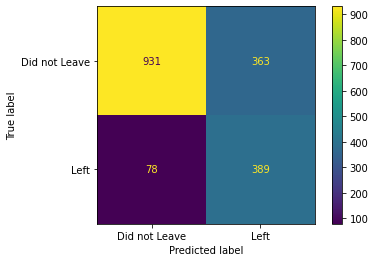

In [40]:
plot_confusion_matrix(clf_xgb,
                      X_test,
                      Y_test,
                      values_format = 'd',
                      display_labels = ['Did not Leave', 'Left'])


# out of 1294 that did not leave 931 (72%) were correctly classified
# out of 467 that left 256 (83%) were correctly classified

# thus the model performed much better this time in capturing the people that left
# however this improvement comes at a cost of not being able to correctly classify the people that didn't left 

In [41]:
# lastly we will draw the first XGBoost tree

# if we want to get information like gain and cover etc at each node in the first tree,
# we just build the first tree, otherwise we'll get the average over all of the trees


# clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic',
#                             seed = 42,
#                             gamma = 0.25,
#                             learn_rate = 0.1,
#                             max_depth = 4,
#                             reg_lambda = 10,
#                             scale_pos_weight = 3,
#                             subsample = 0.9,
#                             colsample_bytree = 0.5,
#                             n_estimators = 1           # we set this to 1 so that we can get gain cover etc
#                            )

# clf_xgb.fit(X_train, Y_train)


# now print the weight, gain, cover etc for the tree
# weight = no of times a feature is used in a branch or root across all trees
# gain = the avg gain across all splits that the feature is used in
# cover = the avg cover across all splits that the feature is used in
# total_gain = the total gain across all splits that the feature is used in
# total_cover = the total gain across all splits that the feature is used in

# NOTE : since we only build one tree, gain = total_gain and cover = total_cover


# bst = clf_xgb.get_booster()

# for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
#     print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))
    
# node_params = {'shape' : 'box',
#                'style' : 'filled, rounded',
#                'fillcolor' : '#78cbe'}
# leaf_params = {'shape' : 'box',
#                'style' : 'filled',
#                'fillcolor' : '#e48038'}


# NOTE : num_trees is not the number of trees to plot, but the specific tree you want to plot
# default value is 0

# xgb.to_graphviz(clf_xgb, num_trees = 0, size = '10,10',
#                 condition_node_params = node_params,
#                 leaf_node_params = leaf_params)